In [1]:
import warnings
warnings.filterwarnings('ignore')

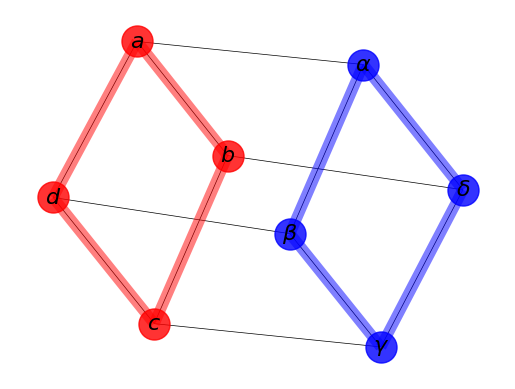

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=0.5, alpha=1)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, alpha=0.5, edge_color='b')


# some math labels
labels = {}
labels[0] = r'$a$'
labels[1] = r'$b$'
labels[2] = r'$c$'
labels[3] = r'$d$'
labels[4] = r'$\alpha$'
labels[5] = r'$\beta$'
labels[6] = r'$\gamma$'
labels[7] = r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()

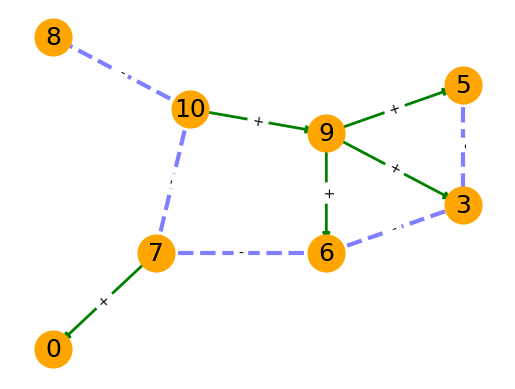

In [3]:
import matplotlib.pyplot as plt
import networkx as nx


G=nx.DiGraph()
# Add nodes by specifying their positions
G.add_node('10', pos=(2, 10))
G.add_node('9',  pos=(4, 9))
G.add_node('8',  pos=(0, 13))
G.add_node('7',  pos=(1.5, 4))
G.add_node('6',  pos=(4, 4))
G.add_node('5',  pos=(6, 11))
G.add_node('3',  pos=(6, 6))
G.add_node('0',  pos=(0, 0))
# Add edges by defining weight and label
G.add_edge('10','9',weight=1, label='+')
G.add_edge('10','8',weight=1, label='-')
G.add_edge('10','7',weight=1, label='-')
G.add_edge('9','3', weight=1, label='+')
G.add_edge('9','6',weight=1, label='+')
G.add_edge('9','5',weight=1, label='+')
G.add_edge('7','0',weight=1, label='+')
G.add_edge('7','6',weight=0, label='-')
G.add_edge('6','3',weight=0, label='-')
G.add_edge('5','3',weight=0, label='-')


elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+'] # solid edge
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-'] # dashed edge

# Retrieve the positions from graph nodes and save to a dictionary
pos=nx.get_node_attributes(G,'pos')
# Draw nodes
nx.draw_networkx_nodes(G,pos,node_size=700, node_color='orange')

# Draw edges
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=2, edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=3,
                       alpha=0.5,edge_color='b', arrows=False,style='dashed')

# Draw node labels
nx.draw_networkx_labels(G,pos,font_size=18,font_family='sans-serif')

# Draw edge labels
edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.savefig("communication_authority_graph.pdf", format='pdf') # save as eps
plt.show() # display